# illustrates the use of the `proxy`, `analogs` and `scalar_plot` classes

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
%matplotlib inline

In [10]:
import os 
import sys
import pathlib

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import the development version of paleopy

In [12]:
sys.path.insert(0, '../')

In [13]:
from paleopy import proxy 
from paleopy import analogs
from paleopy.plotting import scalar_plot

### determine the current working directory 

In [14]:
cwd = pathlib.Path.cwd() 

In [15]:
print(cwd)

/home/nicolasf/research/PICT_notebooks/notebooks


### example 1: defines one proxy

#### defines the folder where the JSON files are (for the datasets) and where to save the proxy JSON files

In [16]:
djsons = cwd.parent / 'jsons'

In [17]:
pjsons = djsons / 'proxies'

In [18]:
if not djsons.exists(): 
    djsons.mkdir()

In [19]:
if not pjsons.exists(): 
    pjsons.mkdir()

### instantiates a proxy instance, the list of valid datasets + variables is below

+ **vcsn**: 
    + TMean 
    + Rain
+ **ersst**: 
    + sst
+ **gpcp**: 
    + Rain
+ **ncep**: 
    + hgt_1000
    + hgt_850
    + hgt_200
    + omega_500 
    + uwnd_1000
    + vwnd_1000 
    + uwnd_850
    + vwnd_850 
    + uwnd_200
    + vwnd_200

## the list of valid attributes is defined in the help of the proxy class 

In [20]:
print(proxy.__doc__)


    base class for a single proxy

    Parameters
    ----------

    sitename : string
            The name of the proxy site
            user-defined, no default

    proxy_type : string
            the type of proxy
            can be e.g.:
            "Tree-ring"
            "Speleotheme"
            "Coral core"
            user-defined, no default

    lon : float
            The longitude (in decimal degrees) of the site
            user-defined, no default

    lat : float
            The latitude (in decimal degrees) of the site
            user-defined, no default

    djsons : string
            The path to the json files defining the paths
            and parameters arrached to each dataset + variable
            defined by the frontend in PICT, default is ./jsons

    pjsons : string
            The path where to save the individual proxy json files
            defined by the frontend in PICT, default is ./jsons/proxies

    pfname : string
            the name of the JSO

### the cell below instantiates a correct proxy instance by passing all the relevant parameters 

In [21]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          qualitative = 0, \
          calc_anoms = 1, \
          detrend = 1, \
        method = 'quintiles')

### the first step is to find the analog seasons, by calling the `find_analogs` method 

In [22]:
p.find_analogs()

### now the proxy instance `p` contains attributes that hold the results of the `find_analogs` method, and we can print the information about the proxy and the derived information related to the extraction

In [23]:
p.proxy_repr(pprint=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'slope': 0.030535947029886677, 'intercept': -60.96501637775516}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
weights:[0.15645480307020584, 0.12800536294956205, 0.13090508326029401, 0.16334634614636281, 0.15762466128135916, 0.1220029495538857, 0.1416607937383304]
}


### you can access any of these attributes individually, e.g. those are the extracted analog years

In [24]:
p.analog_years

Int64Index([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype='int64', name='time')

### and these are the weights associated with each analog year 

In [25]:
p.weights

array([0.1564548 , 0.12800536, 0.13090508, 0.16334635, 0.15762466,
       0.12200295, 0.14166079])

In [26]:
p.weights.sum()

0.9999999999999999

### `analogs` is an attribute of the proxy: it's a `pandas` dataframe containing info about the analog years 

In [27]:
p.analogs

,d_anomalies,cat,weights
time,,,
1982-02-15,0.638992,WA,0.156455
1997-02-15,0.747619,WA,0.128005
1999-02-15,0.736547,WA,0.130905
2000-02-15,0.612678,WA,0.163346
2001-02-15,0.565475,WA,0.157625
2006-02-15,0.429462,WA,0.122003
2009-02-15,0.504521,WA,0.141661


### you can save this if you want into a csv file, by calling the `to_csv` method of a pandas dataframe

In [28]:
p.sitename

'Rarotonga'

In [29]:
filename = cwd.parent / (p.sitename + '_analogs.csv')

In [30]:
filename

PosixPath('/home/nicolasf/research/PICT_notebooks/Rarotonga_analogs.csv')

In [31]:
p.analogs.to_csv(filename)

In [32]:
!ls -lt {filename}

-rw-rw-r-- 1 nicolasf nicolasf 397 Oct  5 11:05 /home/nicolasf/research/PICT_notebooks/Rarotonga_analogs.csv


### Adding `outfile=True` creates the json file containing the proxy information, with filename `self.pfname`, this needs to be executed if you want to persist the proxy metadata and e.g. use it in an ensemble  

In [33]:
p.proxy_repr(pprint=False, outfile=True)

In [34]:
!ls -lt ../jsons/proxies/Rarotonga.json

-rw-r--r-- 1 nicolasf nicolasf 771 Oct  5 11:05 ../jsons/proxies/Rarotonga.json


### plot the seasonal time-series of anomalies and overlays the analog years

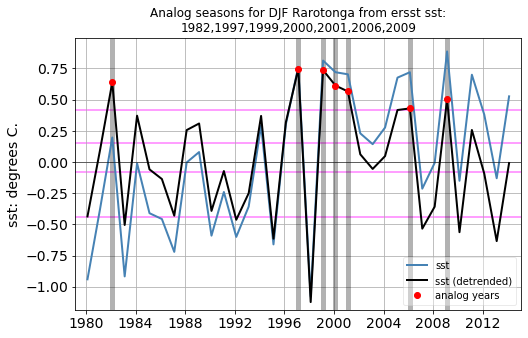

In [35]:
f = p.plot()

### if you want to save the figure, provide a directory and filename, let's create a 'figures' directory in the 'PICT_notebooks' directory 

In [36]:
fpath = cwd.parent / 'figures'

In [37]:
if not fpath.exists(): 
    fpath.mkdir()

In [38]:
filename = fpath / (p.sitename + '_proxy_time_series.png')

### you can pass the resolution of the resulting png file (in dot per inch), using the `dpi` argument, and it is useful to pass the argument `bbox_inches='tight'` for the bounding box to be optimized automatically

In [39]:
f.savefig(filename, dpi=200, bbox_inches='tight')

In [40]:
!ls -ltr {filename}

-rw-r--r-- 1 nicolasf nicolasf 205799 Oct  5 11:05 /home/nicolasf/research/PICT_notebooks/figures/Rarotonga_proxy_time_series.png


### Now you can instantiate an object of the class 'analog', by passing the dataset and variable you want to calculate the composite anomalies for 

In [41]:
print(analogs.__doc__)


    base class for analogs calculations,
    takes either a `proxy` or `ensemble` instance

    Parameters
    ----------

    dataset : string
            The name of the dataset for which the composite are to be calculated
            e.g. ['ersst','ncep','vcsn','gpcp']

    variable : string
            The name of the variable to consider for calculing the composite
            e.g. for 'ersst', it's 'sst', for 'ncep', can be ['hgt_1000',
            'hgt_850', etc]
    


In [42]:
compos = analogs(p, 'ncep', 'hgt_1000')

### once it is instantiated, the object `compos` inherit some of the attributes of the proxy defined above 

In [43]:
compos.analog_years

Int64Index([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype='int64', name='time')

In [44]:
compos.season

'DJF'

### you can the call the `composite` method, which will do all the calculations in order to get the composite anomalies associated with  the analog years, this method can be called without any parameters, in which case they will take the defaults 

### note that by default the anomalies for each year are **NOT** weighted, if you want the weights calculated from the proxy to be applied, then you need to pass `weighting = True`

In [45]:
compos.composite?

### by default NO weighting is applied

In [46]:
compos.composite()

### if you want the weights associated with each year to be applied in the calculation of the composite anomalies, pass `weighting=True`

In [47]:
compos.composite(weighting=True)

### now there is a `dset` attribute associated to the `compos` instance, which contains the results of the composite calculations, including the full composite sample, the composite anomalies and the p-value for each grid point  

In [48]:
compos.dset

<xarray.Dataset>
Dimensions:              (dates: 66, latitudes: 73, longitudes: 144, time: 804, years: 7)
Coordinates:
  * latitudes            (latitudes) float32 -90.0 -87.5 -85.0 ... 87.5 90.0
  * time                 (time) datetime64[ns] 1948-01-01 ... 2014-12-01
  * dates                (dates) datetime64[ns] 1949-02-01 ... 2014-02-01
  * longitudes           (longitudes) float32 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * years                (years) int64 1982 1997 1999 2000 2001 2006 2009
Data variables:
    hgt_1000             (time, latitudes, longitudes) float64 -19.0 ... 118.9
    seas_var             (dates, latitudes, longitudes) float64 108.8 ... 109.5
    composite_sample     (years, latitudes, longitudes) float64 0.6033 ... 84.0
    composite_anomalies  (latitudes, longitudes) float64 0.8943 ... 0.7295
    pvalues              (latitudes, longitudes) float64 0.5153 ... 0.7687

### you can save this dataset to a netcdf file 

In [49]:
ncpath = cwd.parent / 'netcdfs'

In [50]:
if not ncpath.exists(): 
    ncpath.mkdir()

In [51]:
filename = ncpath / (p.sitename + '_proxy_composite.nc')

In [52]:
compos.save_to_file(filename)

In [53]:
!ls -ltr {filename}

-rw-r--r-- 1 nicolasf nicolasf 766488 Oct  5 11:06 /home/nicolasf/research/PICT_notebooks/netcdfs/Rarotonga_proxy_composite.nc


### Now plots the map of composite anomalies, by default the 5% *p* value contour is plotted

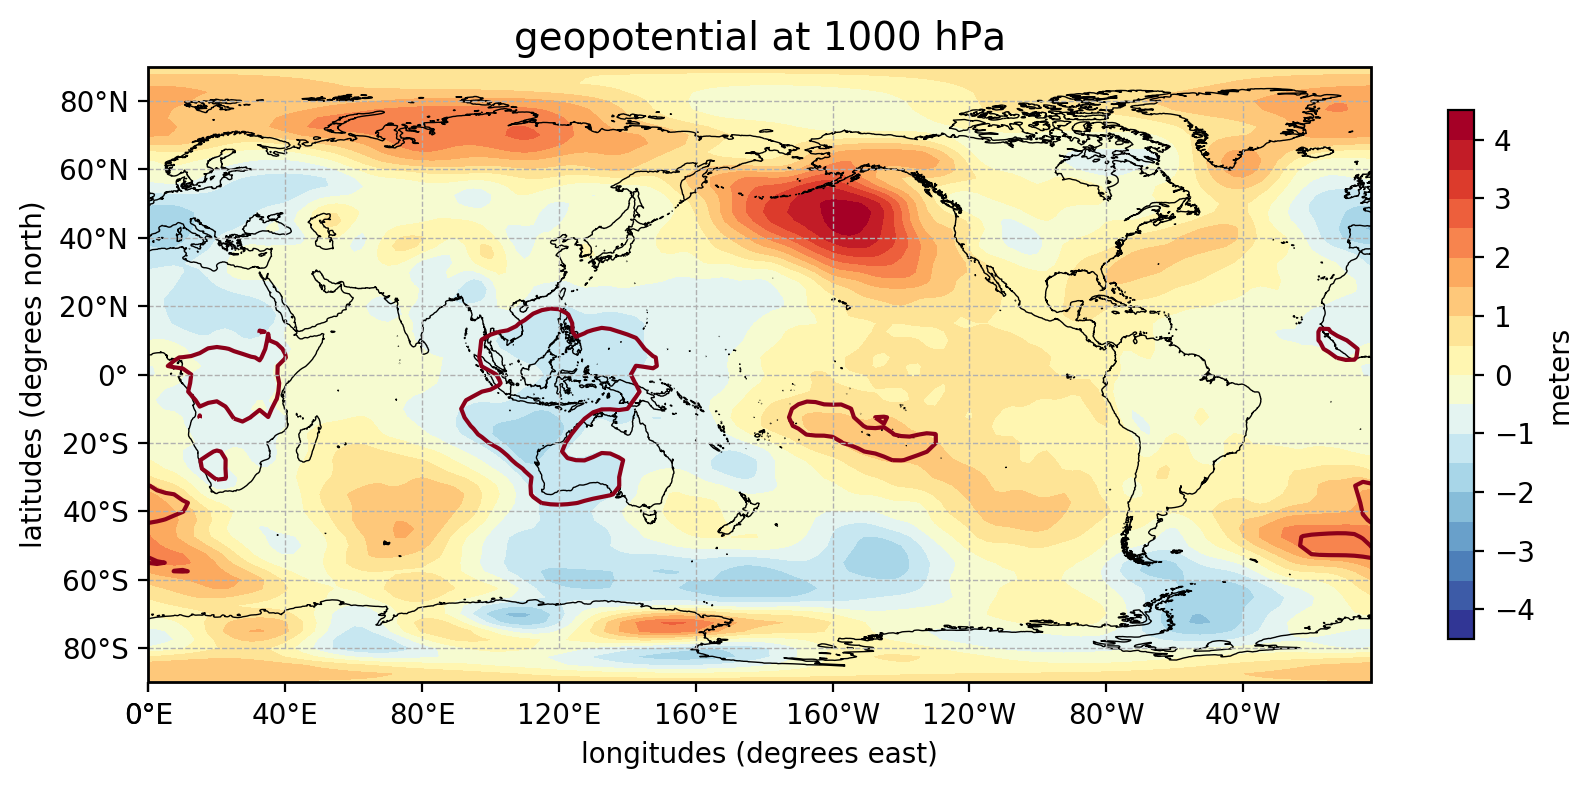

In [54]:
f, ax = scalar_plot(compos).plot()

### you can override this with passing explicitely the *p* value you want the contour for (e.g. 10% = 0.1) 

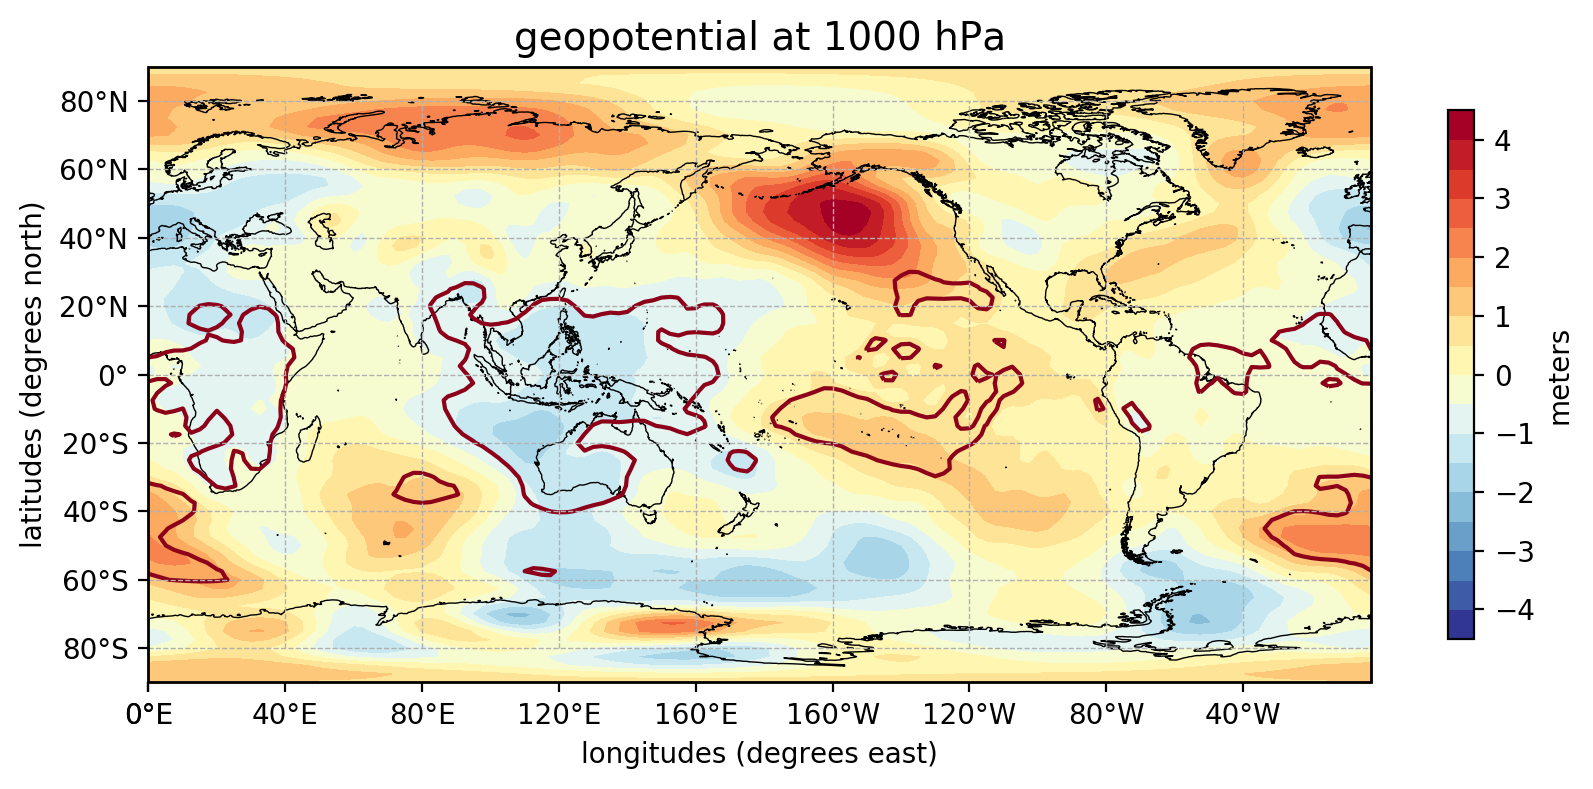

In [55]:
f, ax = scalar_plot(compos, test=0.1).plot()

### Now do the same with the SSTs from the ERSST dataset 

In [56]:
compos = analogs(p, 'ersst', 'sst')

In [57]:
compos.composite()

/home/nicolasf/mambaforge/envs/PICT_notebooks/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


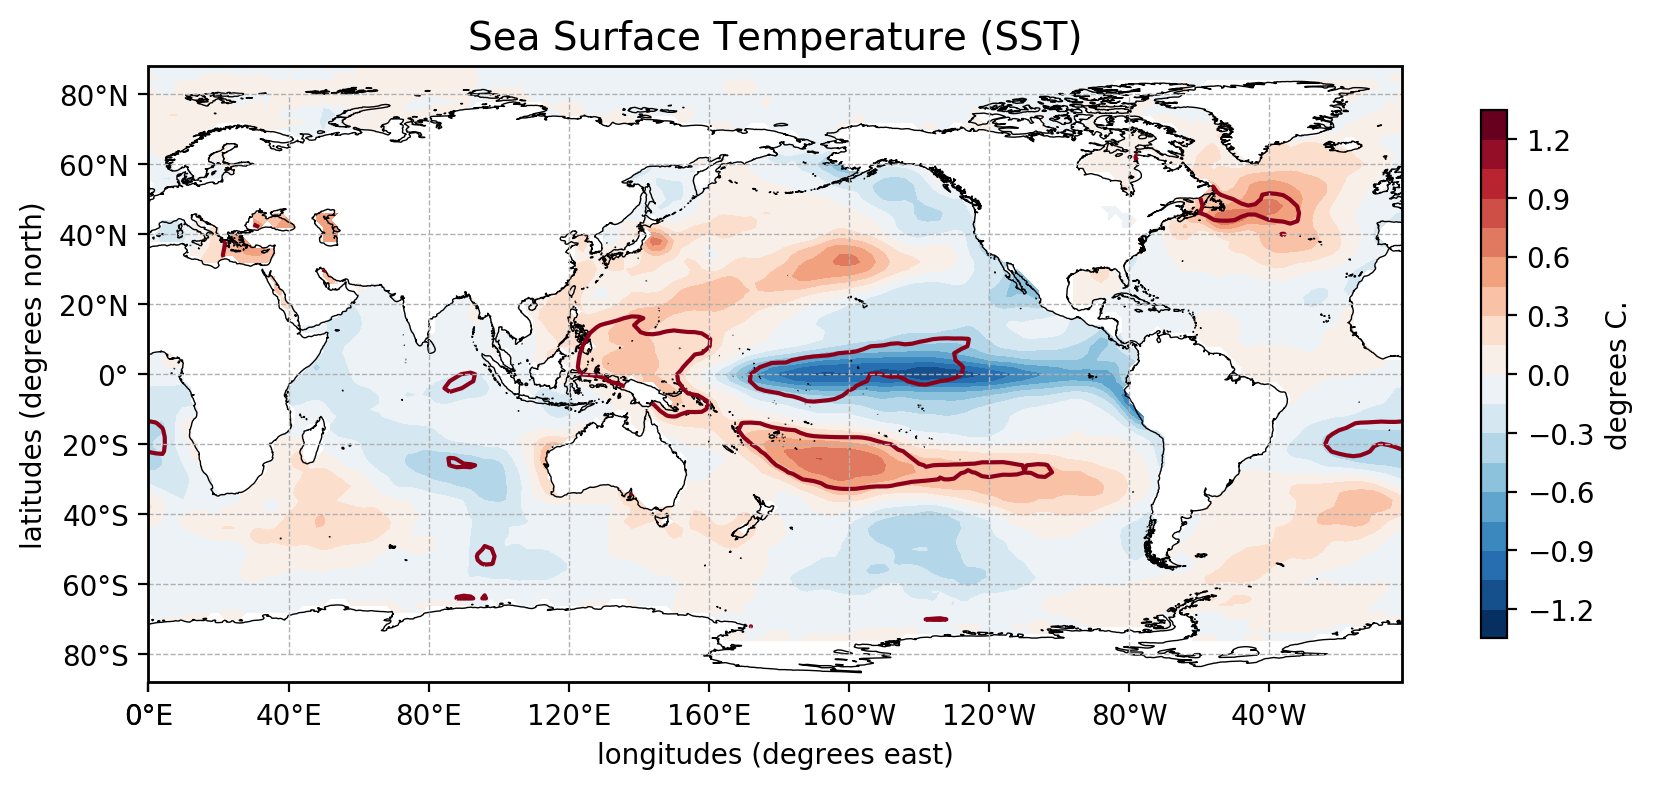

In [58]:
f, ax = scalar_plot(compos).plot()

### you can plot the location of the proxy (proxies if an ensemble) by passing the argument `proxy_loc`=True to the `scalar_plot` class 

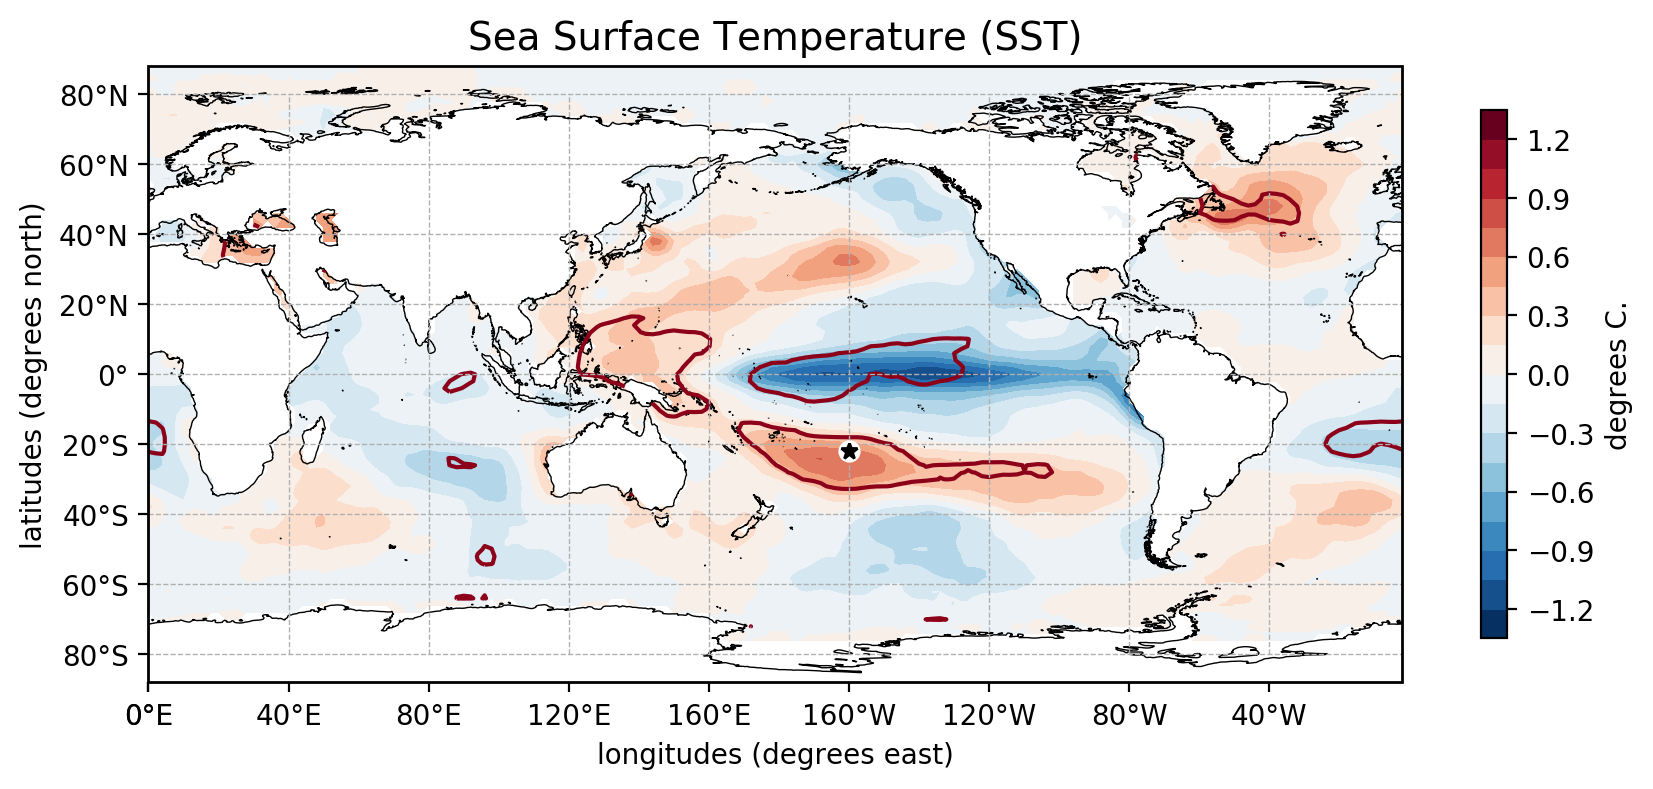

In [59]:
f, ax = scalar_plot(compos, proxies_loc=True).plot()

### the figure is returned in the `f` object, which you can save to file, and the main ax is returned in the ax object, so that you can change the attributes if needed 

### e.g. here we change the title 

In [60]:
ax.set_title('NEW TITLE')

Text(0.5, 1, 'NEW TITLE')

### now the figure object `f` will have the new attribute

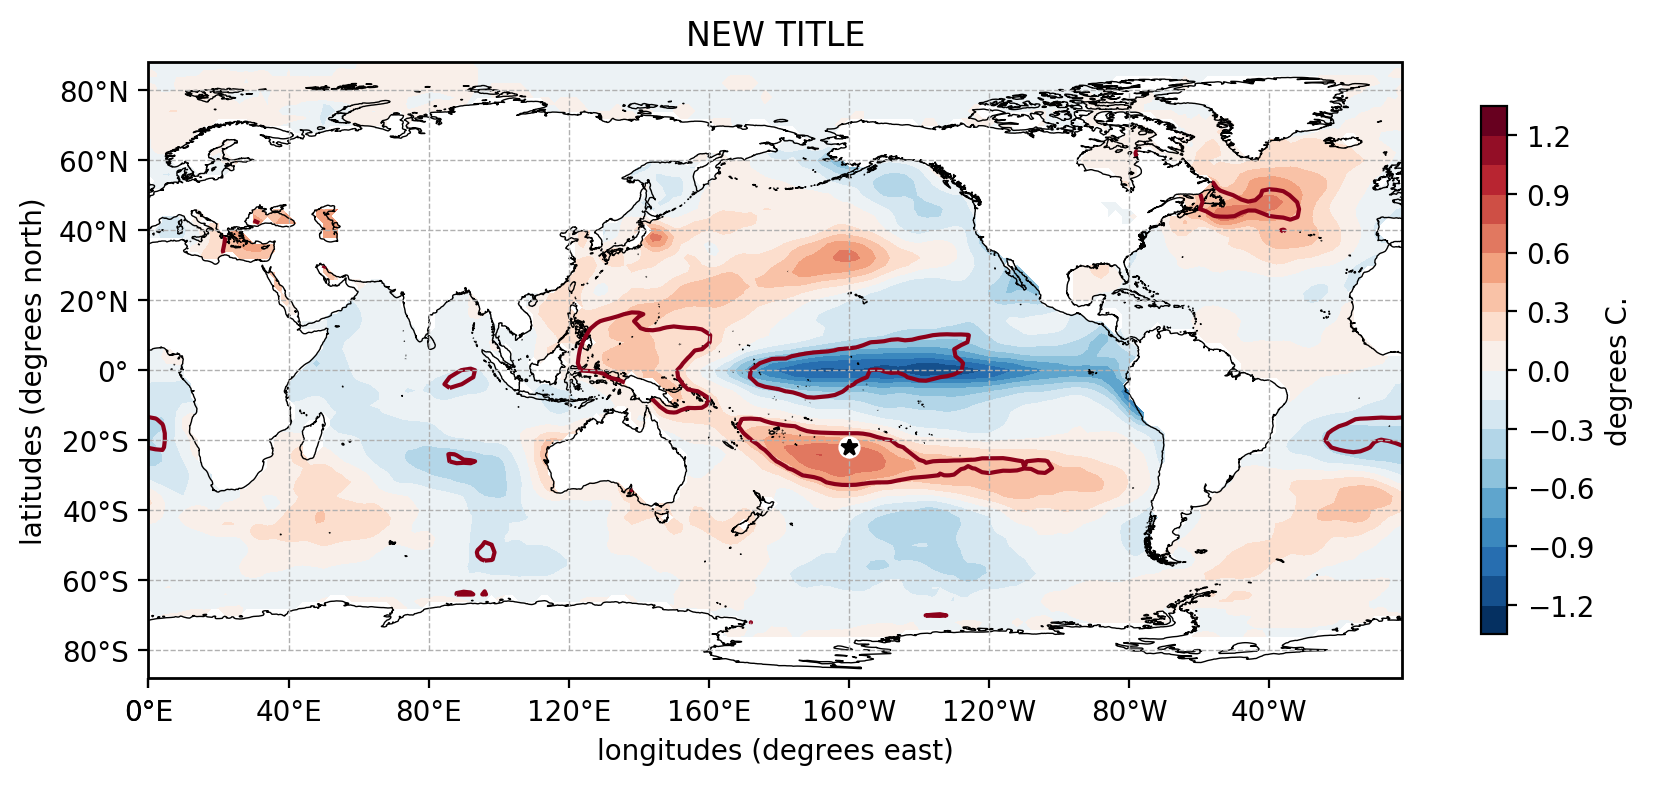

In [61]:
f

### it can allow you to 'zoom' over a region after the plot is made, by using the `set_extent` method, and passing a list with [longitude West, longitude East, Latitude South, Latitude North]

In [62]:
ax.set_extent([120, 360-120, -40, 40])

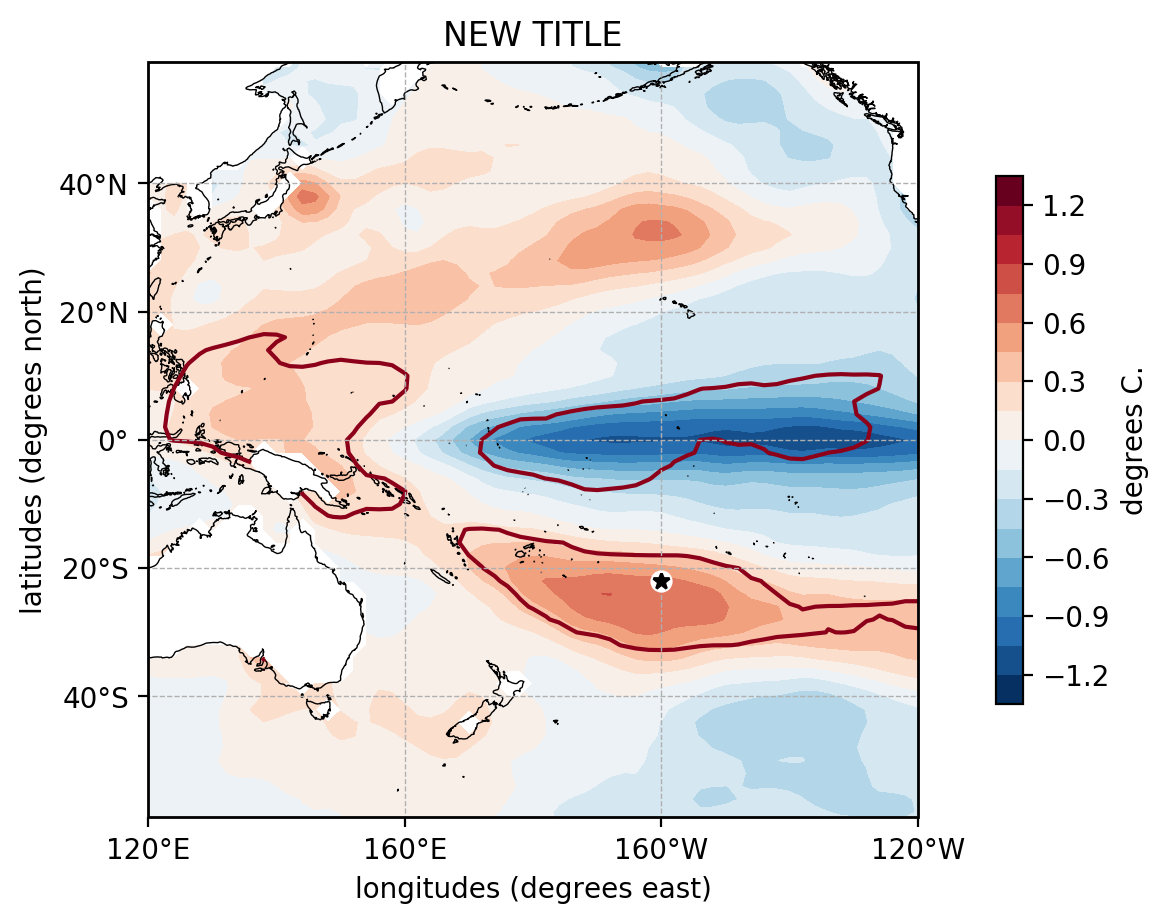

In [63]:
f

### However this might result in non-optimal plot, you can also pass the domain when constructing the composite

(<Figure size 1487.8x1000 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f6a3c7a76a0>)

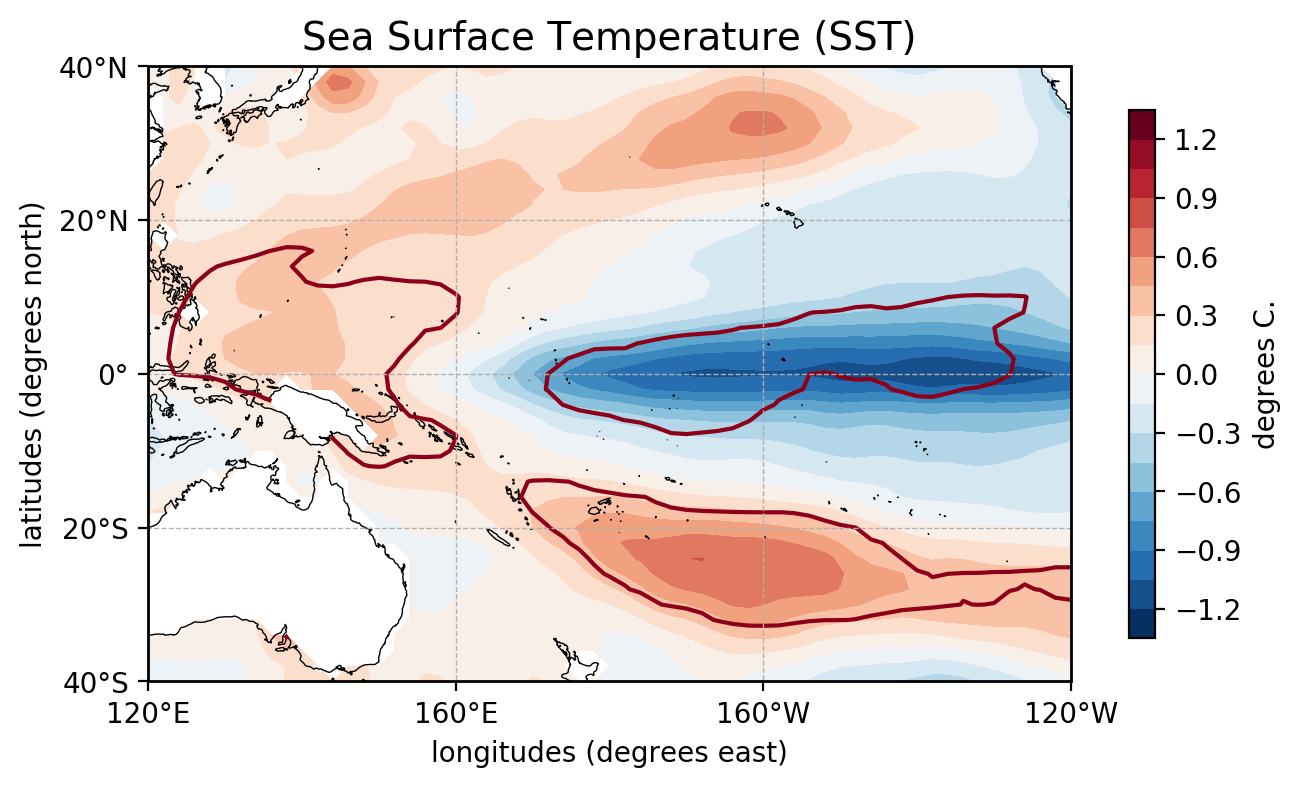

In [64]:
scalar_plot(compos, domain=[120, 360-120, -40, 40]).plot()

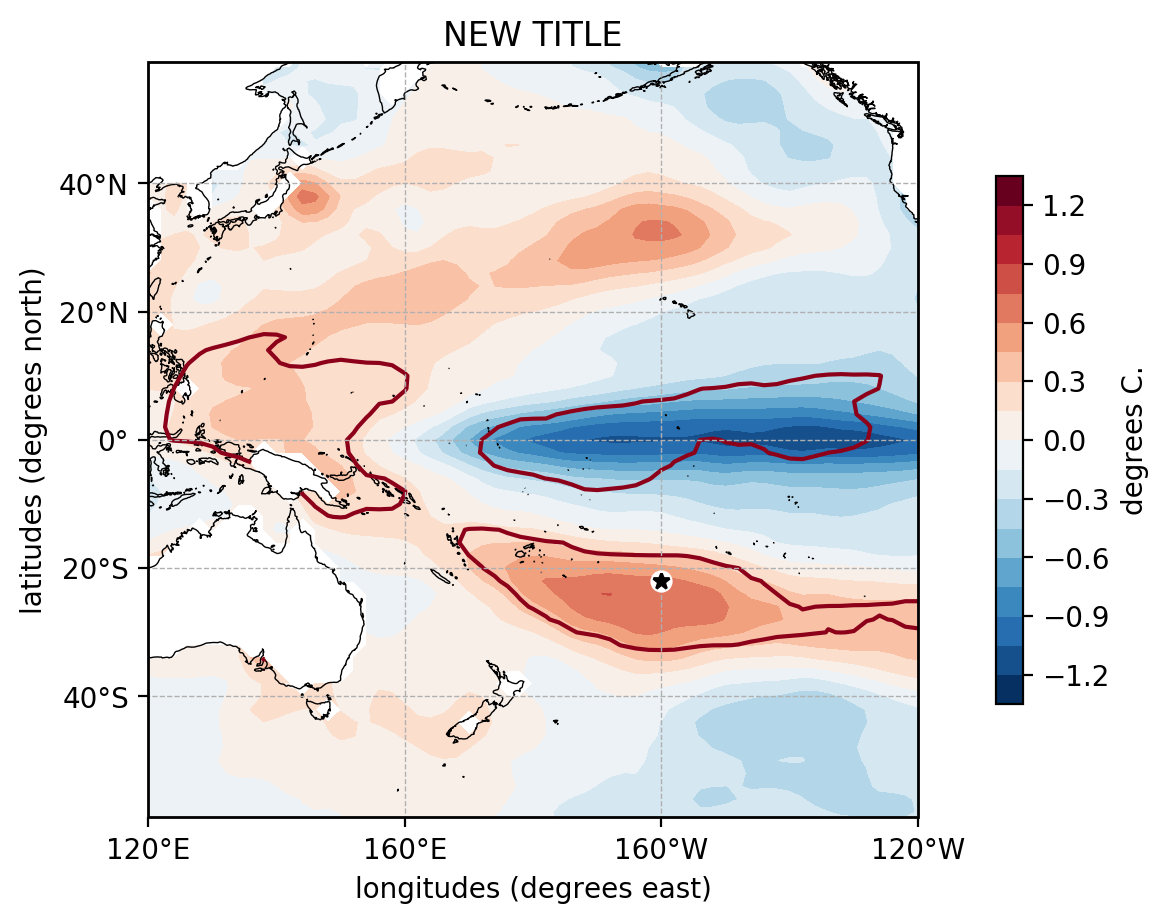

In [65]:
f